![Image not found](https://wallpapercave.com/wp/wp4059913.jpg)

# Introduction

The Indian Premier League (IPL) is a professional Twenty20 cricket league that was established in 2008 by the Board of Control for Cricket in India (BCCI). It consists of eight teams representing various cities across India, each composed of a blend of domestic and international players. Renowned for its fast-paced action and exciting contests, the IPL has emerged as one of the most prestigious and financially rewarding cricket tournaments globally. Every year, millions of fans eagerly anticipate and watch IPL matches, making it a highly anticipated event in the cricketing calendar.

This IPL dataset contains a comprehensive list of match results and statistics from the first 15 seasons of the league, spanning from 2008 to 2019. The dataset includes information on the teams that played in each match, the scores of both teams, the winner of the match, the winning margin, the player of the match, and other key statistics.
The dataset was acquired from Kaggle's [IPL Complete Dataset](https://www.kaggle.com/datasets/nowke9/ipldata).

# Importing modules

In [1]:
#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading and Reading Data

In [3]:
data = pd.read_csv("matches.csv")
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data.shape

(756, 18)

In [5]:
Data = pd.read_csv("deliveries.csv")
Data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## DATA CLEANING

In [6]:
# Datatypes of all the columns of the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
# Sum of all null values in dataset.
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
# Null values in city column of datset.
data.city.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
751    False
752    False
753    False
754    False
755    False
Name: city, Length: 756, dtype: bool

In [9]:
# Dataset where city column has null values.
data[data.city.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [10]:
# Replace all null values in city column with "Dubai".
data.fillna({'city':'Dubai'},inplace=True)

In [11]:
data.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [12]:
# Dataset where umpire1 column has null values.
data[data['umpire1'].isnull()]  

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [13]:
# Replace all null values in umpire1 column with "Sundaram Ravi".
data.fillna({'umpire1':'Sundaram Ravi'},inplace=True)

In [14]:
# Sum of all null values in dataset.
data.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              0
umpire2              2
umpire3            637
dtype: int64

In [15]:
# Dataset where umpire2 column has null values.
data[data['umpire2'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Sundaram Ravi,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,Sundaram Ravi,NaN,NaN


In [16]:
# Replace all null values in umpire2 column with "Virender Sharma".
data.fillna({'umpire2':'Virender Sharma'},inplace=True)

In [17]:
# Sum of all null values in dataset.
data.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              0
umpire2              0
umpire3            637
dtype: int64

In [18]:
# Dataset where winner column has null values.
data[data['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [19]:
# Dataset where player_of_the match column has null values.
data[data['player_of_match'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [20]:
# Replace all null values in winner column and player_of_match column with "Unavailable".
data.fillna({'winner':'Unavailable','player_of_match':'Unavailable'},inplace=True)

In [21]:
# Sum of all null values in dataset.
data.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              0
umpire2              0
umpire3            637
dtype: int64

In [22]:
# Dataset where umpire3 column has null values.
data[data['umpire3'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Sundaram Ravi,Virender Sharma,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [23]:
# Dataset where empire3 column has null values.
data[data['umpire3'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Sundaram Ravi,Virender Sharma,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [24]:
# Replace all null values in empire3 column with "Unavailable".
data.fillna({'umpire3':'Unavailable'},inplace=True)

In [25]:
# Sum of all null values in dataset. 
data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

# Total number of matches played

In [26]:
print("Total matches played till date:",data["id"].count())

Total matches played till date: 756


# 1. Total number of matches played in each season

In [27]:
wins_per_season = data.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
        Unavailable                     1
Name: winner, Length: 103, dtype: int64

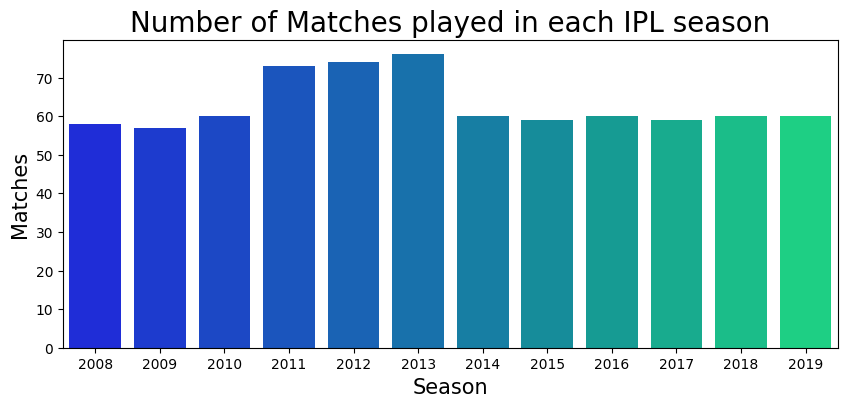

In [28]:
plt.figure(figsize=(10,4))
sns.countplot(x='season', data=data, palette='winter')
plt.title("Number of Matches played in each IPL season", fontsize=20)
plt.xlabel("Season", fontsize=15)
plt.ylabel('Matches', fontsize=15)
plt.show()

The IPL season of 2013 had the highest number of matches played between 2008 and 2019, with a total of 76 matches.

# Toss Analysis

## 2. Prefered Toss decision per season

In [29]:
tossdec = data.groupby('season')['toss_decision'].value_counts()
tossdec = pd.DataFrame(tossdec)
tossdec.columns = ['Count']
tossdec.reset_index(inplace=True)
tossdec.set_index('season',inplace=True)
tossdec

,toss_decision,Count
season,,
2008,field,32
2008,bat,26
2009,bat,35
2009,field,22
2010,bat,39
2010,field,21
2011,field,48
2011,bat,25
2012,bat,37


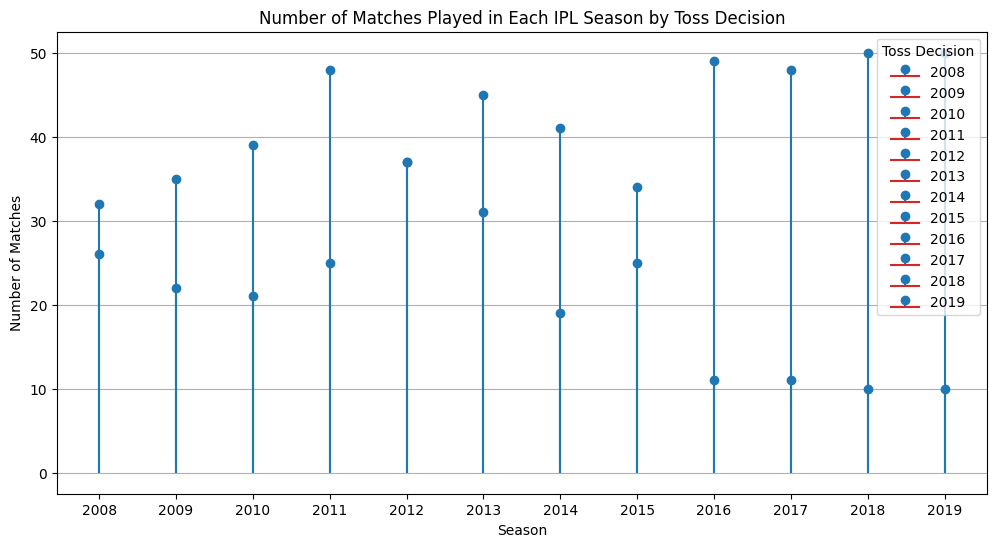

In [30]:
matches_by_season_toss = data.groupby(['season', 'toss_decision']).size().unstack(fill_value=0)

# Set up the stem plot
plt.figure(figsize=(12, 6))
for i, (index, row) in enumerate(matches_by_season_toss.iterrows(), start=1):
    plt.stem([i, i], [row['bat'], row['field']], label=index)
plt.xticks(range(1, len(matches_by_season_toss) + 1), matches_by_season_toss.index)
plt.title("Number of Matches Played in Each IPL Season by Toss Decision")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.legend(title='Toss Decision')
plt.grid(axis='y')  # Add grid for better readability
plt.show()

The number of matches played in each IPL season by toss decision has been increasing over time, with the most matches being played in 2016.

## 3. Decison made after winning the toss

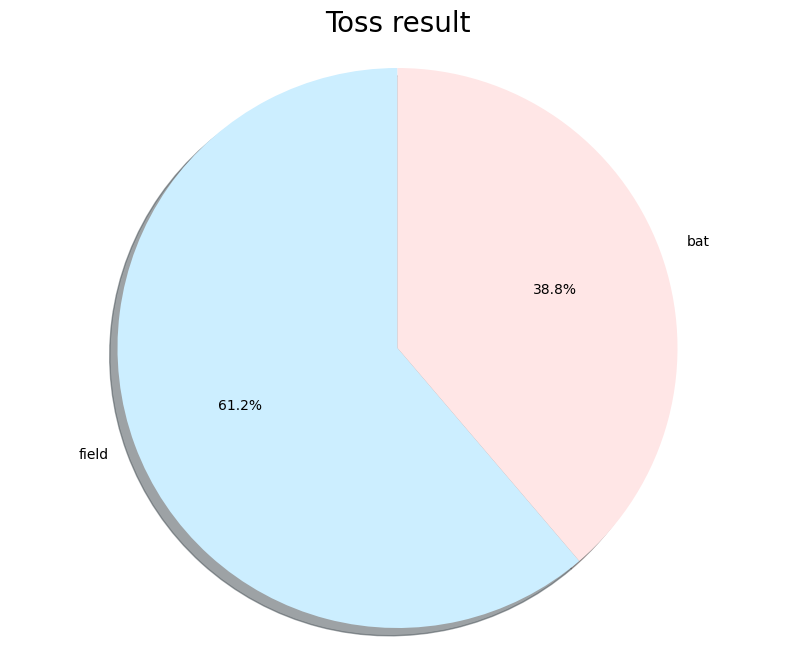

In [31]:
# we will plot pie chart on Toss decision
Toss=data.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#cceeff','#ffe6e6']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal')
plt.show()

The results of the toss were 61.2% in favor of fielding and 38.8% in favor of batting.

## 4. Numbers of matches won by Toss result

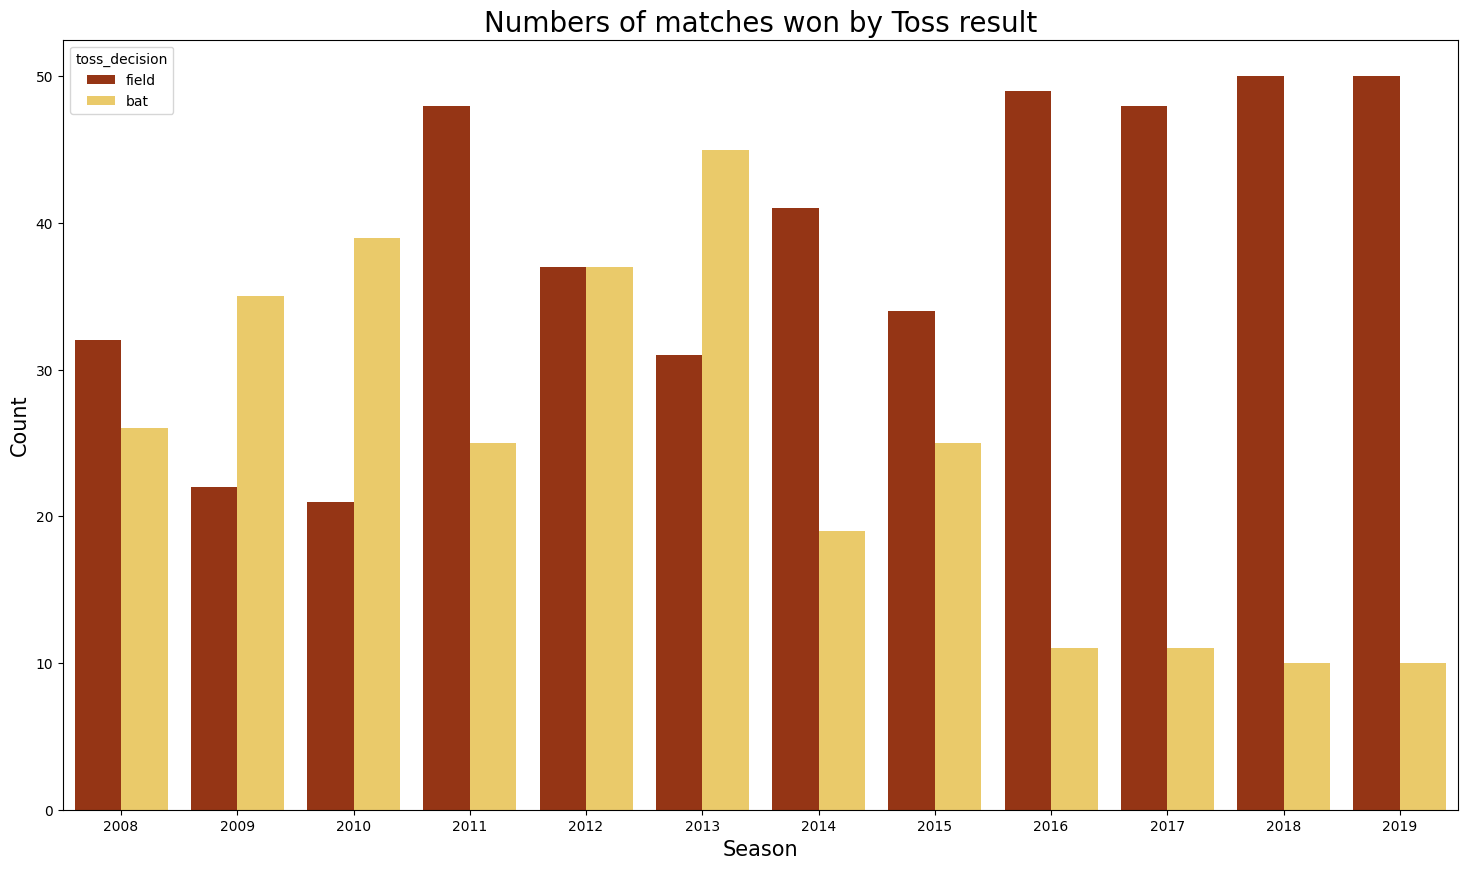

In [32]:
plt.figure(figsize=(18, 10))
sns.countplot(x='season', hue='toss_decision', data=data, palette='afmhot')
plt.title("Numbers of matches won by Toss result", fontsize=20)
plt.xlabel("Season", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

## 5. Has Toss-winning helped in Match-winning?

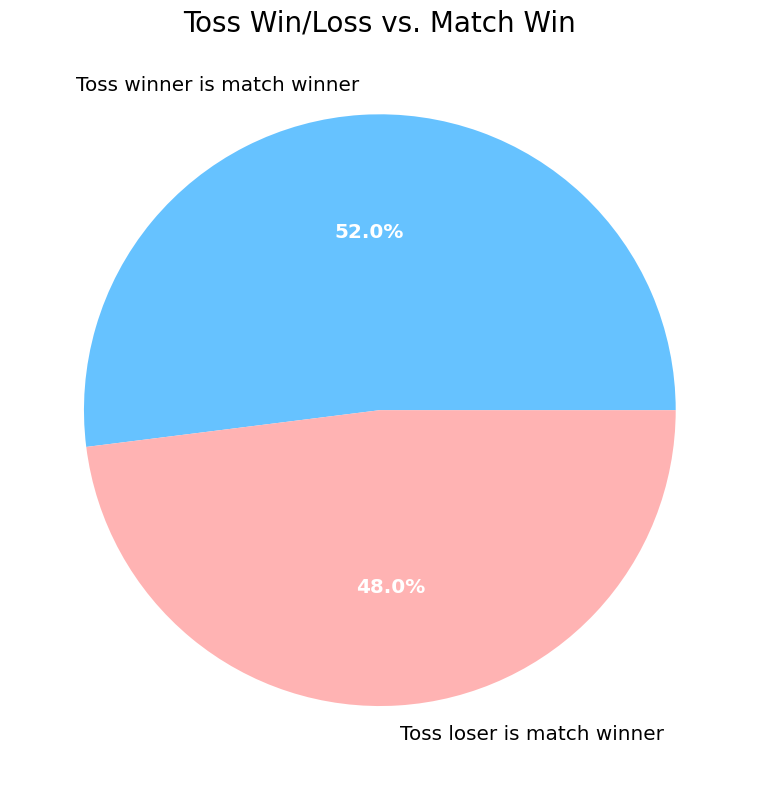

In [33]:
number_of_times_toss_winner_is_match_winner = data[data['toss_winner'] == data['winner']]['id'].count()
number_of_times_toss_loser_is_match_winner = data[data['toss_winner'] != data['winner']]['id'].count()

labels = ['Toss winner is match winner', 'Toss loser is match winner']
sizes = [number_of_times_toss_winner_is_match_winner, number_of_times_toss_loser_is_match_winner]

fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size
patches, texts, pcts = ax.pie(sizes, labels=labels, autopct='%.1f%%', textprops={'size': 'x-large'}, colors=['#66c2ff', '#ffb3b3'])
plt.setp(pcts, color='white', fontweight='bold')
ax.set_title("Toss Win/Loss vs. Match Win", fontsize=20)
plt.tight_layout()
plt.show()

Though winning toss gives teams an advantage but it doesn't significantly implies that winning the toss helps in winning the game.

## 6. Toss decision vs win/loss

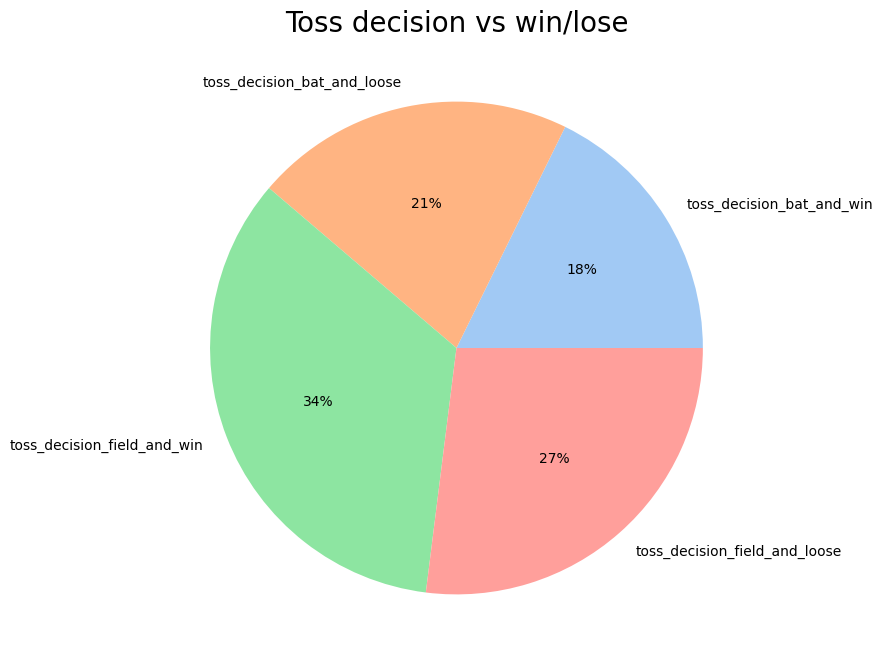

In [34]:
toss_decision_bat = data[data['toss_decision'] == 'bat']
toss_decision_bat_and_win = toss_decision_bat[toss_decision_bat['toss_winner'] == toss_decision_bat['winner']]['id'].count()

toss_decision_bat = data[data['toss_decision'] == 'bat']
toss_decision_bat_and_loose = toss_decision_bat[toss_decision_bat['toss_winner'] != toss_decision_bat['winner']]['id'].count()

toss_decision_field = data[data['toss_decision'] == 'field']
toss_decision_field_and_win = toss_decision_field[toss_decision_field['toss_winner'] == toss_decision_field['winner']]['id'].count()

toss_decision_field = data[data['toss_decision'] == 'field']
toss_decision_field_and_loose = toss_decision_field[toss_decision_field['toss_winner'] != toss_decision_field['winner']]['id'].count()

data_counts = [toss_decision_bat_and_win, toss_decision_bat_and_loose, toss_decision_field_and_win, toss_decision_field_and_loose]
labels = ['toss_decision_bat_and_win', 'toss_decision_bat_and_loose', 'toss_decision_field_and_win', 'toss_decision_field_and_loose']
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10, 8))
plt.pie(x=data_counts, labels=labels, colors=colors, autopct='%.0f%%')
plt.title('Toss decision vs win/lose', fontsize=20)
plt.show()

Choosing to field first after winning the toss has the highest win rate followed by batting first after winning the toss 

## 7. Total number of matches won by each team

In [35]:
winloss = data[['team1','team2','winner']]
winloss.head()

,team1,team2,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore


# 8. Number of wins per team

In [36]:
teamwins = winloss['winner'].value_counts()
teamwins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Unavailable                      4
Name: winner, dtype: int64

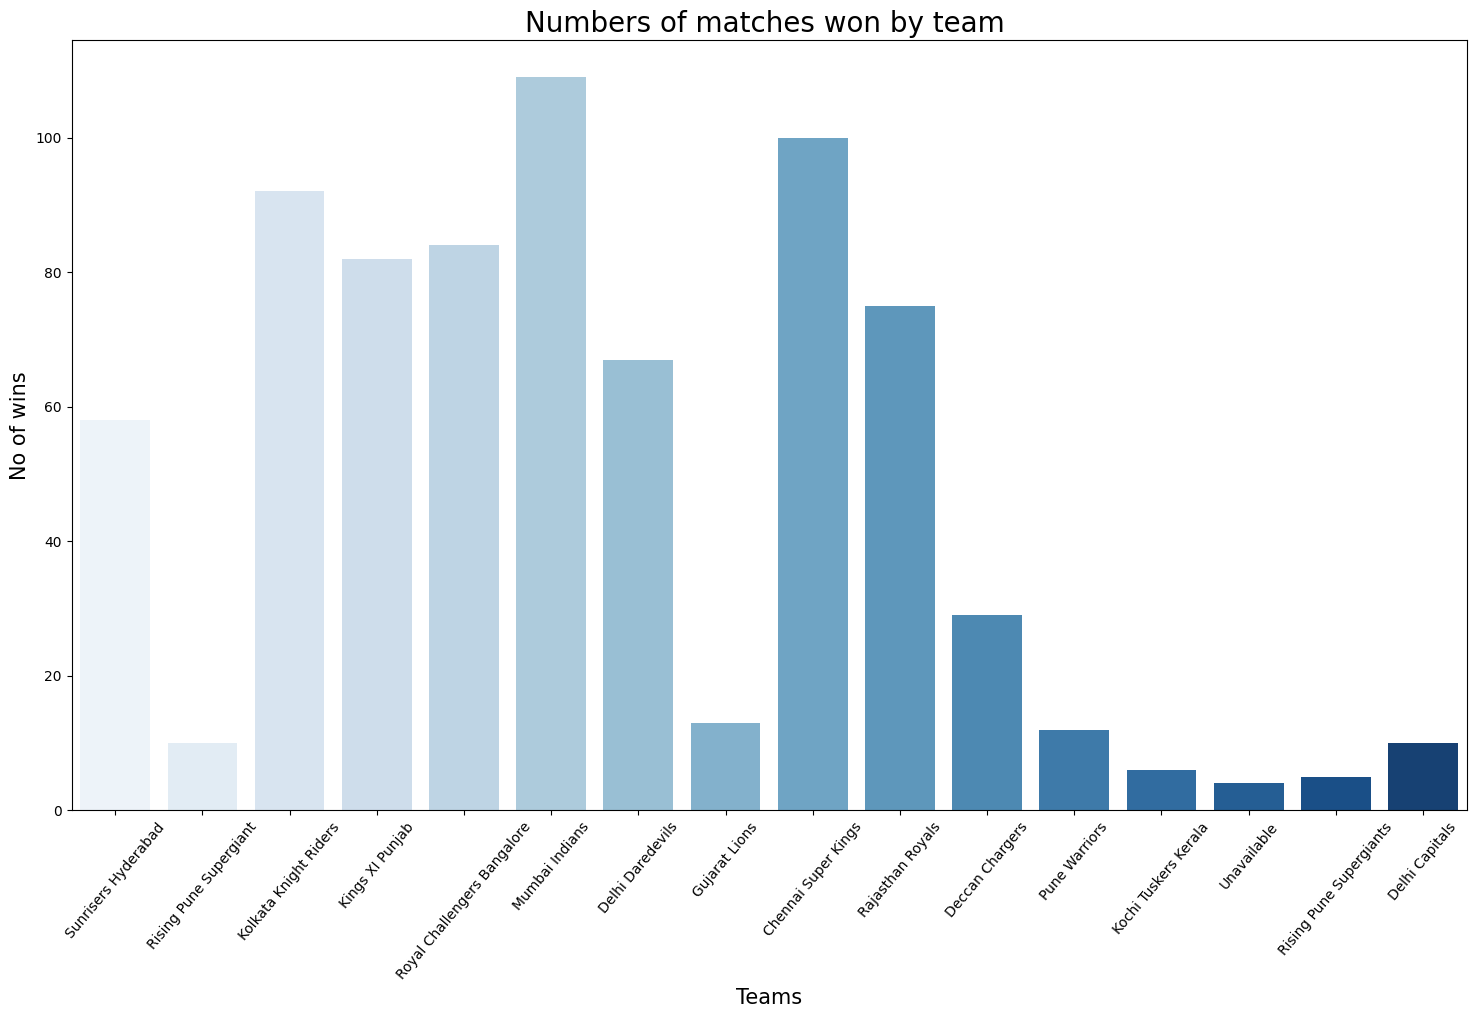

In [37]:
plt.figure(figsize = (18,10))
sns.countplot(x='winner',data=data, palette='Blues')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

From the above graph we can conclude that Mumbai Indians(109)won the most number of matches followed by Chennai Super Kings(100)Kolkata Knight Riders(92).


# 9. Win by highest margin per season

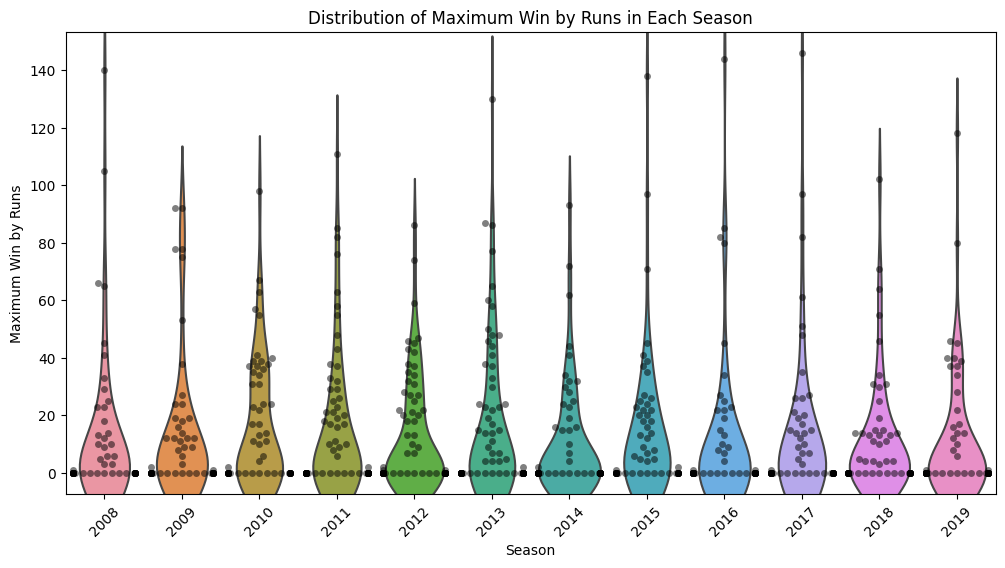

In [38]:
#Violin plot
plt.figure(figsize=(12, 6))  
sns.violinplot(x='season', y='win_by_runs', data=data, inner=None, width=0.8)  
sns.swarmplot(x='season', y='win_by_runs', data=data, color='k', alpha=0.5)  
plt.title('Distribution of Maximum Win by Runs in Each Season')
plt.xlabel('Season')
plt.ylabel('Maximum Win by Runs')
plt.xticks(rotation=45)
plt.show()

The record for highest margin of victory by runs is held by Mumbai Indians when they beat Delhi Capitals by 146 runs in the IPL season of 2017.

# Score Distribution of Each Team by Innings

In [39]:
runs = Data.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs

,match_id,inning,batting_team,total_runs
0,1,1,Sunrisers Hyderabad,207
1,1,2,Royal Challengers Bangalore,172
2,2,1,Mumbai Indians,184
3,2,2,Rising Pune Supergiant,187
4,3,1,Gujarat Lions,183
...,...,...,...,...
1523,11413,2,Delhi Capitals,170
1524,11414,1,Delhi Capitals,155
1525,11414,2,Chennai Super Kings,162
1526,11415,1,Mumbai Indians,152


In [40]:
runs.drop('match_id',axis=1,inplace=True)

## 10. For First Inning

In [41]:
innings1 = runs[runs['inning']==1]
innings1.drop('inning',axis=1,inplace=True)
innings1

,batting_team,total_runs
0,Sunrisers Hyderabad,207
2,Mumbai Indians,184
4,Gujarat Lions,183
6,Rising Pune Supergiant,163
8,Royal Challengers Bangalore,157
...,...,...
1518,Kolkata Knight Riders,143
1520,Chennai Super Kings,136
1522,Sunrisers Hyderabad,171
1524,Delhi Capitals,155


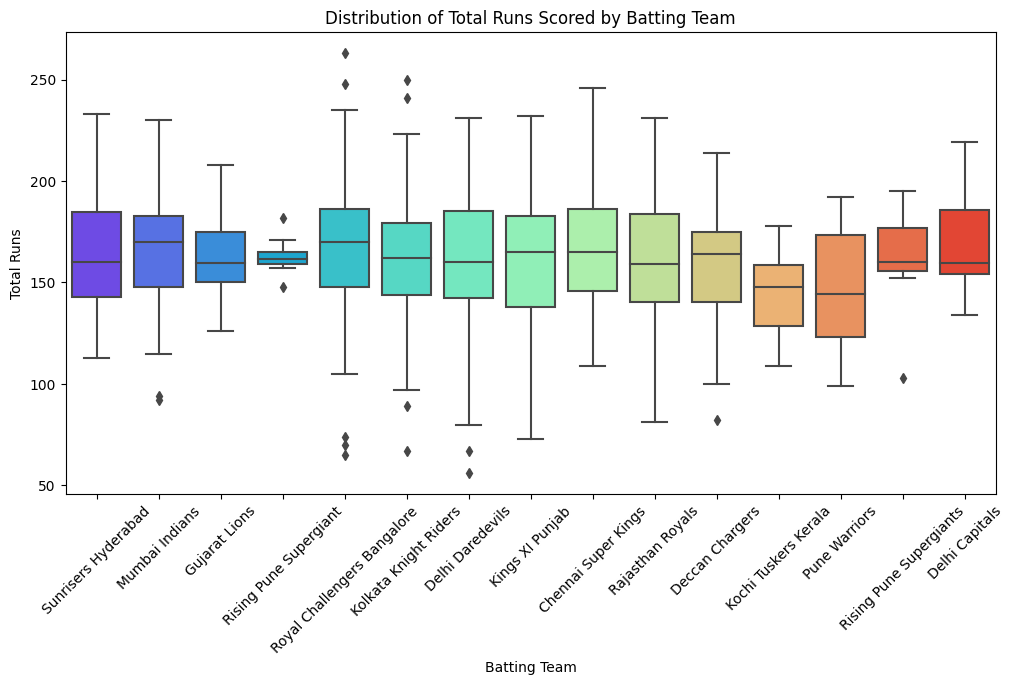

In [42]:
#Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='batting_team', y='total_runs', data=innings1, palette='rainbow') 
plt.title('Distribution of Total Runs Scored by Batting Team')
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)  
plt.show()

The graph displays the range of first inning runs scored by each team. SRH typically scores between 80-85 runs at their lowest and around 230 runs at their highest, averaging approximately 160 runs in the first innings.

## 11.  For 2nd Inning

In [43]:
innings2 = runs[runs['inning']==2]
innings2.drop('inning',axis=1,inplace=True)
innings2

,batting_team,total_runs
1,Royal Challengers Bangalore,172
3,Rising Pune Supergiant,187
5,Kolkata Knight Riders,184
7,Kings XI Punjab,164
9,Delhi Daredevils,142
...,...,...
1519,Mumbai Indians,137
1521,Mumbai Indians,140
1523,Delhi Capitals,170
1525,Chennai Super Kings,162


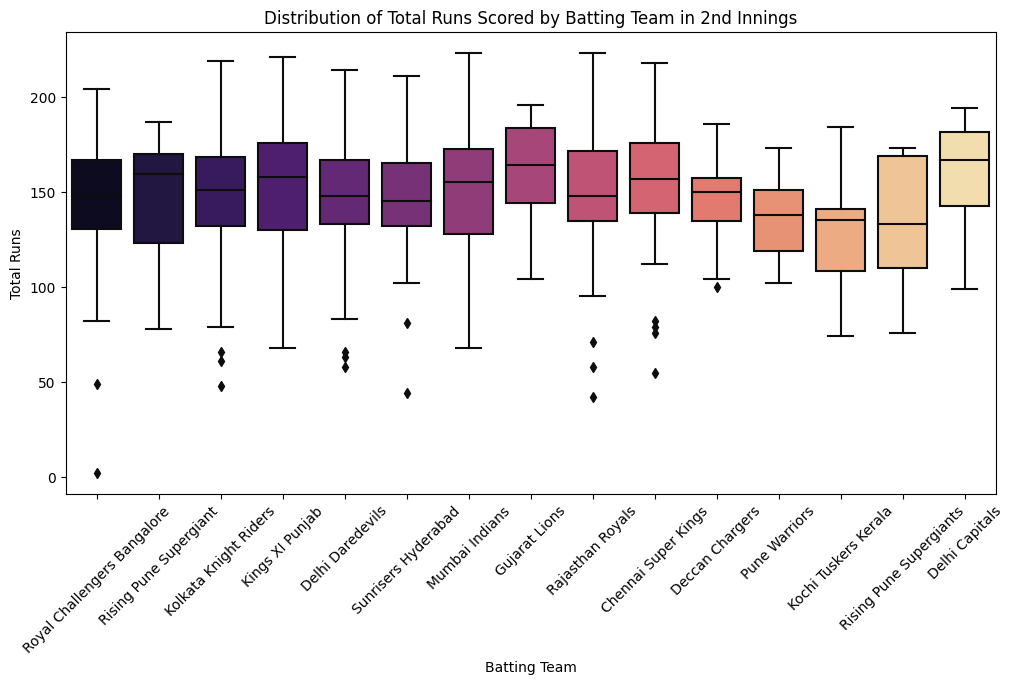

In [44]:
#Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=innings2, x='batting_team', y='total_runs', palette='magma')
plt.title('Distribution of Total Runs Scored by Batting Team in 2nd Innings')
plt.xlabel('Batting Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=45) 
plt.show()

The graph illustrates the spread of runs scored by each team in the 2nd innings. MI's lowest 2nd innings score ranges between 60-70 runs, with their highest score reaching around 230-240 runs, maintaining an average of nearly 160 runs in the 2nd innings of a match

# 12. Finding the Factors Affecting the Victory

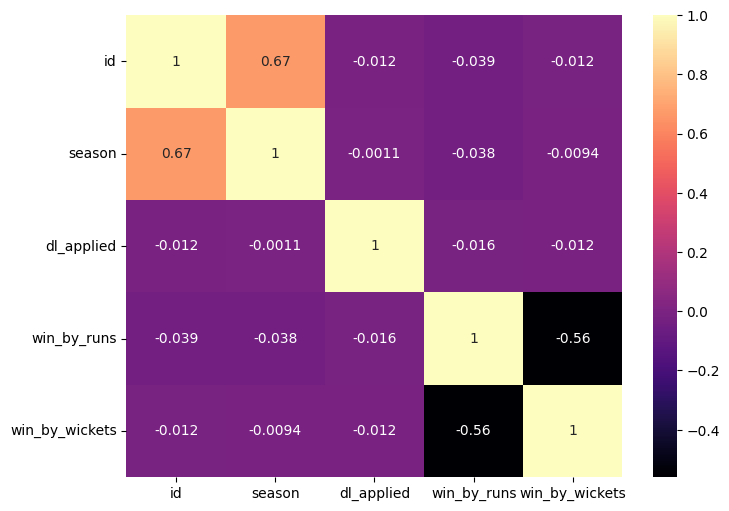

In [45]:
plt.figure(figsize=(8, 6))
fac = sns.heatmap(data.corr(), annot=True, cmap='magma')

# 13. Number of times scored or conceded above 200 runs by each team

In [46]:
scores = Data.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
scores

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207
1,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,172
2,2,1,Mumbai Indians,Rising Pune Supergiant,184
3,2,2,Rising Pune Supergiant,Mumbai Indians,187
4,3,1,Gujarat Lions,Kolkata Knight Riders,183
...,...,...,...,...,...
1523,11413,2,Delhi Capitals,Sunrisers Hyderabad,170
1524,11414,1,Delhi Capitals,Chennai Super Kings,155
1525,11414,2,Chennai Super Kings,Delhi Capitals,162
1526,11415,1,Mumbai Indians,Chennai Super Kings,152


In [47]:
scored_200 = scores[scores['total_runs'] >= 200]
scored_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207
16,9,1,Delhi Daredevils,Rising Pune Supergiant,205
38,20,1,Royal Challengers Bangalore,Gujarat Lions,213
62,32,1,Sunrisers Hyderabad,Kings XI Punjab,207
72,36,1,Sunrisers Hyderabad,Kolkata Knight Riders,209
...,...,...,...,...,...
1475,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,219
1488,11333,1,Royal Challengers Bangalore,Kings XI Punjab,213
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
1499,11338,2,Mumbai Indians,Kolkata Knight Riders,204


In [48]:
# Scored above 200
scored_200['batting_team'].value_counts()

Royal Challengers Bangalore    19
Chennai Super Kings            17
Kings XI Punjab                15
Mumbai Indians                 14
Kolkata Knight Riders          12
Sunrisers Hyderabad            10
Rajasthan Royals                8
Delhi Daredevils                7
Gujarat Lions                   1
Deccan Chargers                 1
Delhi Capitals                  1
Name: batting_team, dtype: int64

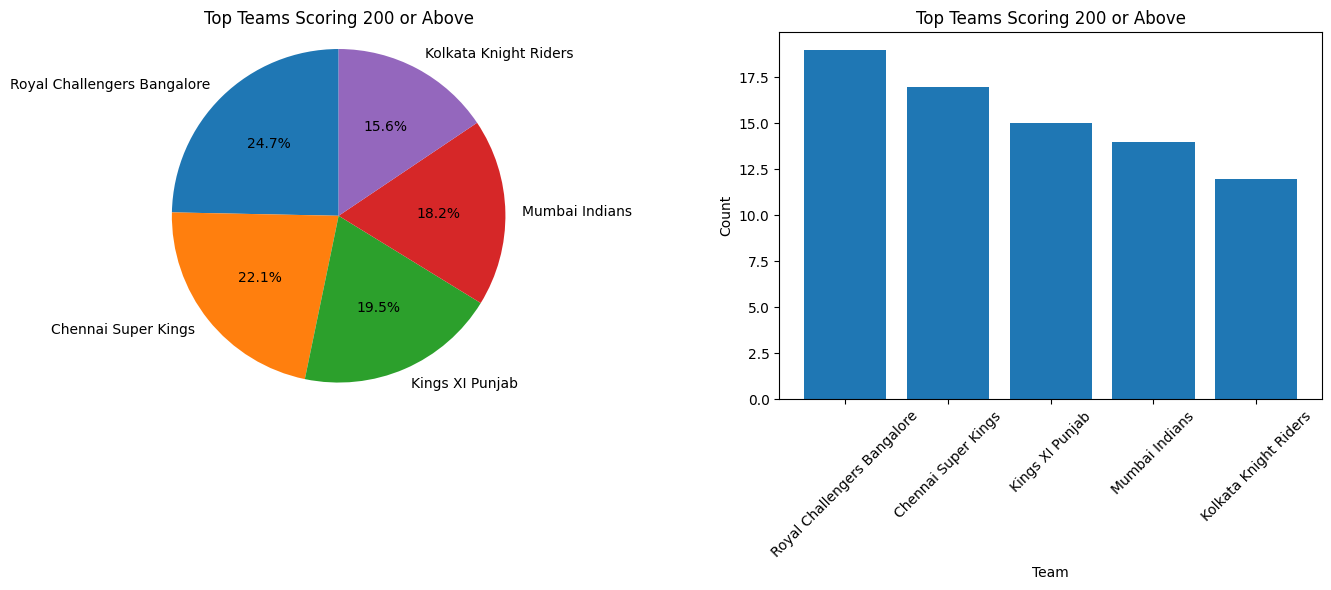

In [49]:
team_counts = scored_200['batting_team'].value_counts()

# Select top teams
top_teams = team_counts.head()
top_teams = team_counts.head()

# Create a figure with 2 subplots: pie chart and bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Pie Chart
ax1.pie(top_teams, labels=top_teams.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Top Teams Scoring 200 or Above')

# Plot Bar Chart
ax2.bar(top_teams.index, top_teams)
ax2.set_title('Top Teams Scoring 200 or Above')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Royal Challengers Bangalore have scored more than 200 runs more often than any other IPL team, followed by Chennai Super Kings.

# 14. City wise analysis

In [50]:
# Which city hosted the most number of matches
city = data['city'].value_counts()
city

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Ranchi              7
Abu Dhabi           7
Cuttack             7
Dubai               7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

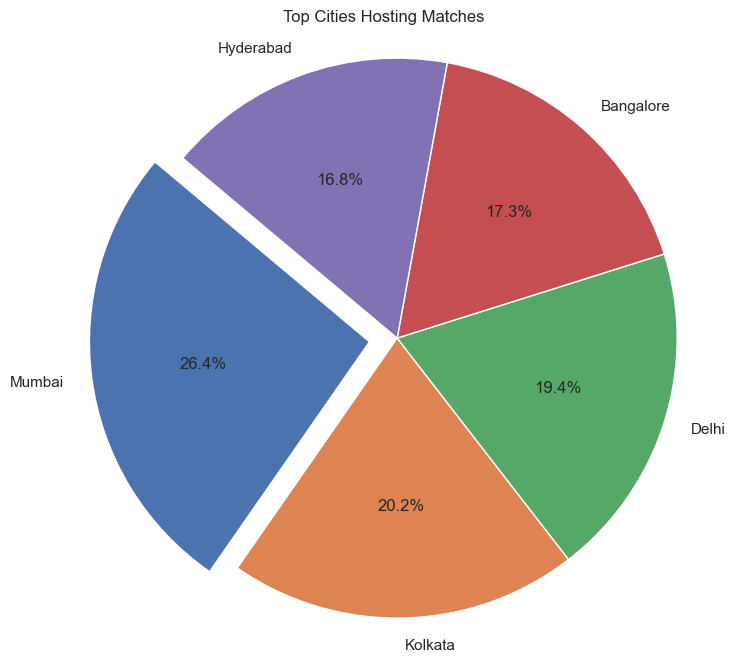

In [51]:
sns.set(style="whitegrid")
city_counts = data['city'].value_counts()
top_cities = city_counts.head()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 8))

# Plot exploded pie chart
explode = (0.1, 0, 0, 0, 0)  # Explode the first slice
ax.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%', startangle=140, explode=explode)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  

plt.title('Top Cities Hosting Matches')

plt.show()

Mumbai has hosted more matches in the IPL during the period from 2008 to 2019.

# 15. Stadium Wise Analysis

In [52]:
venues = data['venue'].value_counts()
venues

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

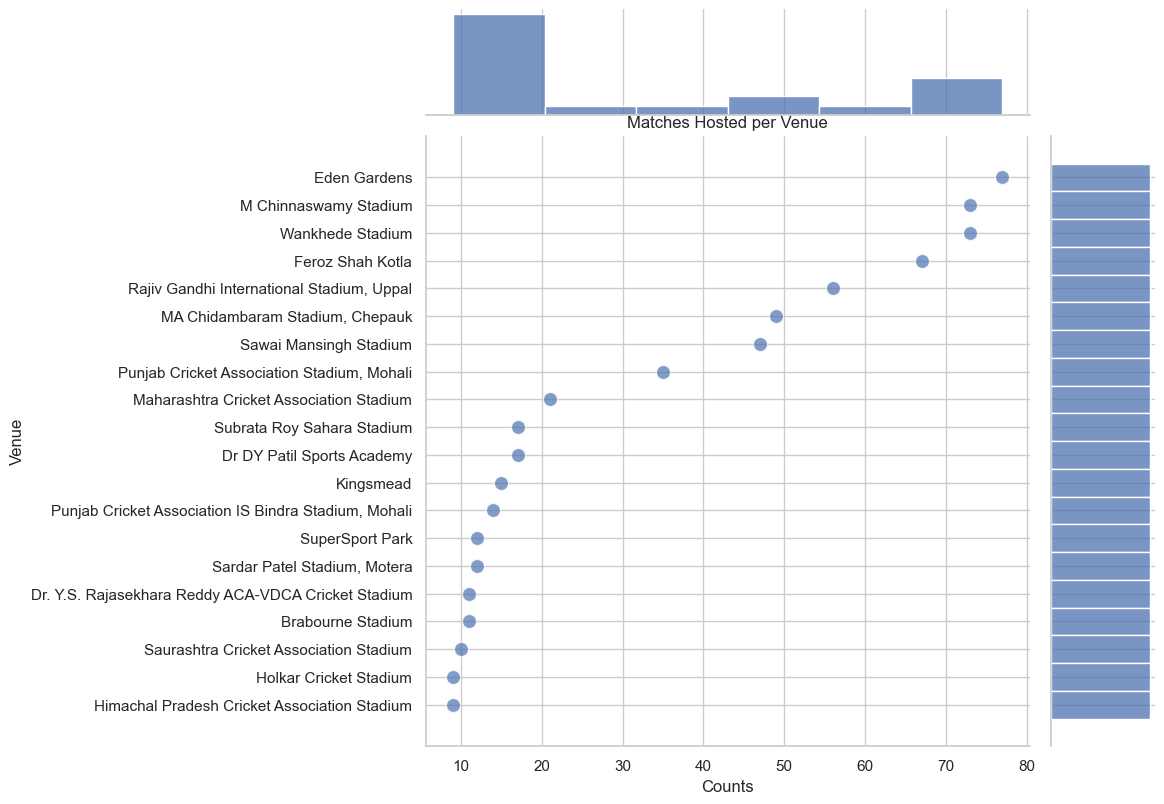

In [53]:
#Joint Plot
sns.jointplot(x=venues.values[:20], y=venues.index[:20], kind="scatter", height=8, marker='o', color='b', s=100, alpha=0.7)  # Adjust marker size, color, and transparency
plt.xlabel('Counts')  
plt.ylabel('Venue')
plt.title('Matches Hosted per Venue')
plt.show()

Eden Gardens hosted the most matches, followed by M. Chinnaswamy Stadium and Wankhede Stadium.

# 16. Comparing two teams

In [54]:
def comparison(team1, team2):
    compare = data[((data['team1']==team1) | (data['team2']==team1)) & ((data['team1']==team2) | (data['team2']==team2))]
    if compare.empty:
        print("No data available for the selected teams.")
        return
    else:
        try:
            # Define custom colors for the teams
            custom_palette = {'Royal Challengers Bangalore': 'red', 'Chennai Super Kings': 'yellow'}
            sns.countplot(x='season', hue='winner', data=compare, palette=custom_palette)
            plt.show()
        except ValueError as e:
            print("ValueError:", e)

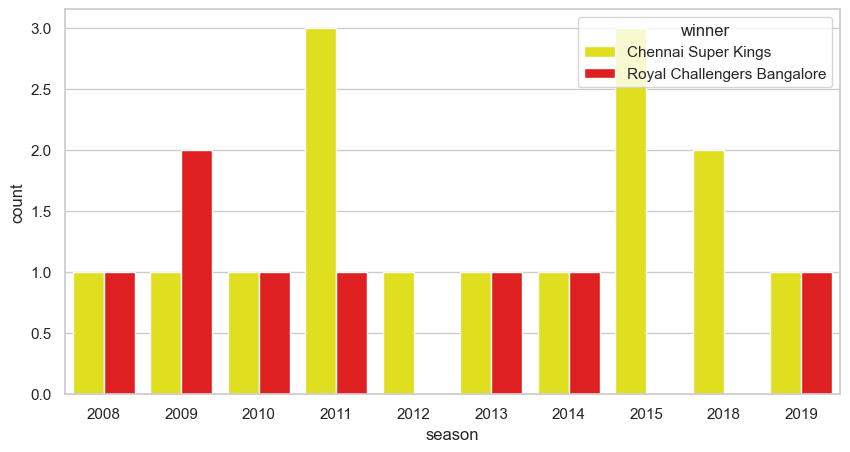

In [55]:
plt.figure(figsize=(10,5))
comparison('Royal Challengers Bangalore', 'Chennai Super Kings')

From the above analysis, we can see that Chennai Super Kings has dominated Royal Challengers Bangalore for most of the times and one interesting note from the above analysis is that in 2015 season Chennai Super Kings and Royal Challengers Bangalore faced each other for 3 times and all the 3 matches were won by Chennai Super Kings.

## Head-to-Head Comparison of Two Teams(Mumbai Indians and Chennai Super Kings)

In [56]:
def geth2h(team1,team2):
    teams = ['Mumbai Indians','Chennai Super Kings']
    if team1 in teams and team2 in teams:
        return True
    else:
        return False

In [57]:
index=[]
for row in data.iterrows():
    flag = geth2h(row[1]['team1'],row[1]['team2'])
    index.append(flag)

In [58]:
sum(index)

28

In [59]:
h2h = data[index]

In [60]:
# Summary of all the matches played against each other
h2h

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
66,67,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,Unavailable
95,96,2008,Mumbai,2008-05-14,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,ST Jayasuriya,Wankhede Stadium,BR Doctrove,AM Saheba,Unavailable
117,118,2009,Cape Town,2009-04-18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,19,0,SR Tendulkar,Newlands,BR Doctrove,K Hariharan,Unavailable
161,162,2009,Port Elizabeth,2009-05-16,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,ML Hayden,St George's Park,SK Tarapore,SJA Taufel,Unavailable
193,194,2010,Mumbai,2010-03-25,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,5,SR Tendulkar,Brabourne Stadium,BF Bowden,AM Saheba,Unavailable
210,211,2010,Chennai,2010-04-06,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,24,0,SK Raina,"MA Chidambaram Stadium, Chepauk",S Asnani,DJ Harper,Unavailable
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,Unavailable
256,257,2011,Mumbai,2011-04-22,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,8,0,Harbhajan Singh,Wankhede Stadium,Asad Rauf,AM Saheba,Unavailable
307,308,2012,Chennai,2012-04-04,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,RE Levi,"MA Chidambaram Stadium, Chepauk",JD Cloete,SJA Taufel,Unavailable
354,355,2012,Mumbai,2012-05-06,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,2,DR Smith,Wankhede Stadium,Asad Rauf,S Asnani,Unavailable


# 17. MI vs CSK Head-to-Head Match Results

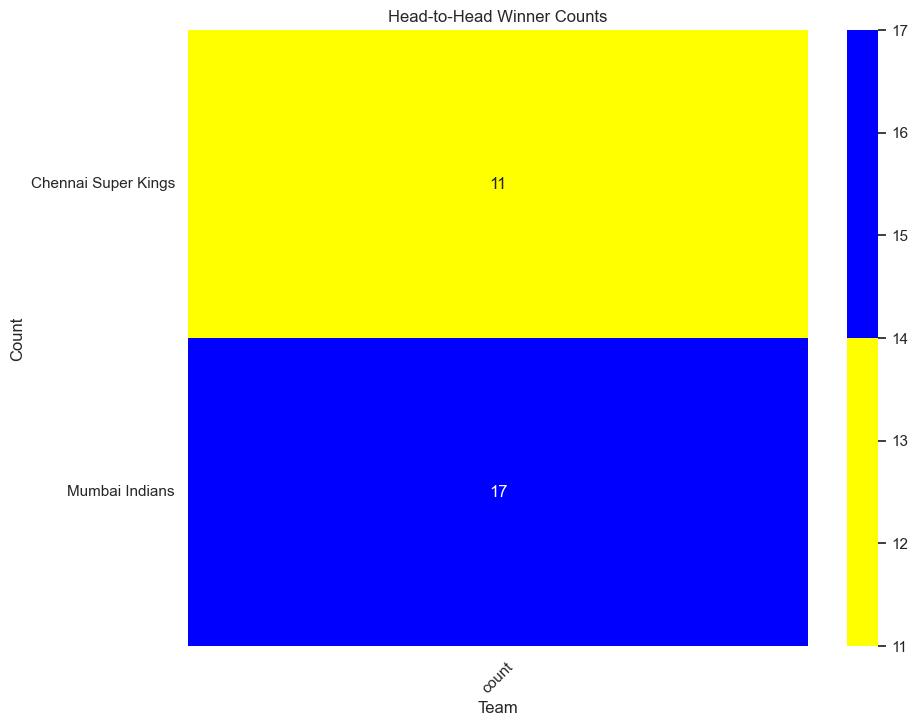

In [61]:

custom_palette = sns.color_palette(['yellow', 'blue'])

# Calculate contingency table for winner counts
winner_contingency = pd.crosstab(index=h2h['winner'], columns='count')

# Create a heatmap for the contingency table with the custom color palette
plt.figure(figsize=(10, 8))
sns.heatmap(winner_contingency, annot=True, cmap=custom_palette, fmt='d')
plt.title('Head-to-Head Winner Counts')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


The Mumbai Indians (MI) have won more matches than the Chennai Super Kings (CSK) in head-to-head encounters

# 18. Most Player of the Match Award Winner

In [62]:
data['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 227, dtype: int64

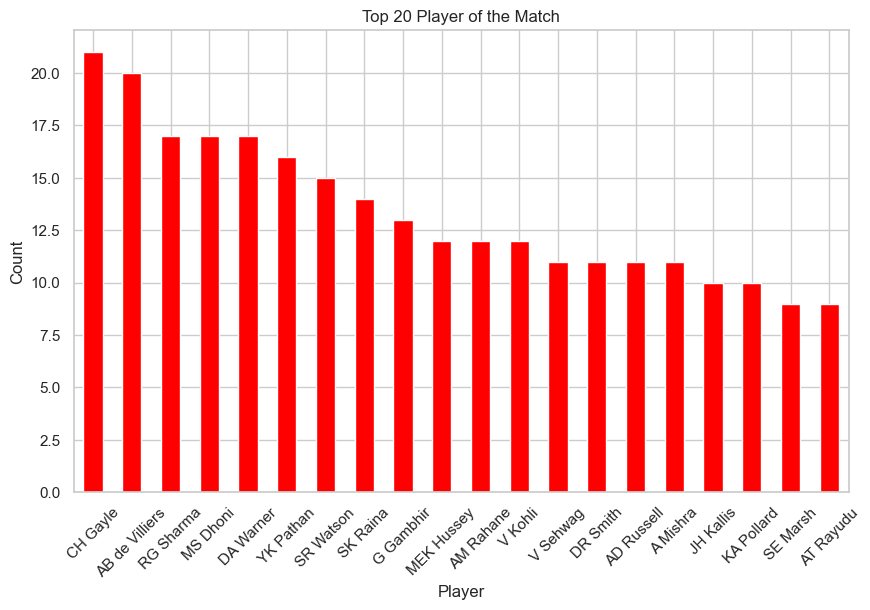

In [63]:
# Top 20 most Player of the Match Award Winners
player_of_match_counts_top20 = data['player_of_match'].value_counts().head(20)

# Plot the data
plt.figure(figsize=(10, 6))
player_of_match_counts_top20.plot(kind='bar',color='red')
plt.title('Top 20 Player of the Match')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

Chris Gayle has won the most Player of the Match awards (21) followed closely by AB Devilliers (20).

# 19. Numbers of six hit in each season 

In [64]:
#no of sixes hit by team
season_data=data[['id','season','winner']]
complete_data=Data.merge(season_data,how='inner',left_on='match_id',right_on='id')
six_data=complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


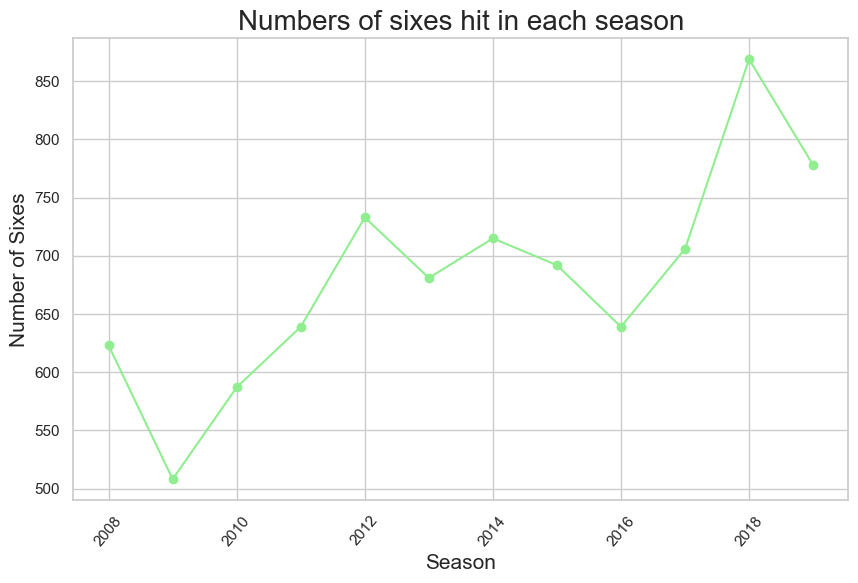

In [65]:
import matplotlib.pyplot as plt

# Assuming you have already calculated six_data

# Grouping by season and counting the number of sixes hit in each season
sixes_per_season = six_data.groupby('season')['batsman_runs'].agg([('six', 'count')]).reset_index()

# Plotting using a line plot
plt.figure(figsize=(10, 6))
plt.plot(sixes_per_season['season'], sixes_per_season['six'], marker='o', color='#90EE90', linestyle='-')
plt.title("Numbers of sixes hit in each season", fontsize=20)
plt.xlabel("Season", fontsize=15)
plt.ylabel("Number of Sixes", fontsize=15)
plt.xticks(rotation=50)
plt.grid(True) 
plt.show()


The number of sixes hit in the IPL has increased steadily over the years, with the 2018 season

## 20. Number of fours hit in the each season

In [70]:
# Filter the data for fours
four_data = complete_data[complete_data['batsman_runs'] == 4]

# Group by batting team and aggregate
fours_by_team = four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours', 'sum'), ('fours', 'count')])

# Display the results
print(fours_by_team)


                             runs by fours  fours
batting_team                                     
Chennai Super Kings                   8772   2193
Deccan Chargers                       3828    957
Delhi Capitals                         968    242
Delhi Daredevils                      8632   2158
Gujarat Lions                         1840    460
Kings XI Punjab                       9832   2458
Kochi Tuskers Kerala                   680    170
Kolkata Knight Riders                 9736   2434
Mumbai Indians                       10352   2588
Pune Warriors                         2100    525
Rajasthan Royals                      8140   2035
Rising Pune Supergiant                 788    197
Rising Pune Supergiants                684    171
Royal Challengers Bangalore           9440   2360
Sunrisers Hyderabad                   5776   1444


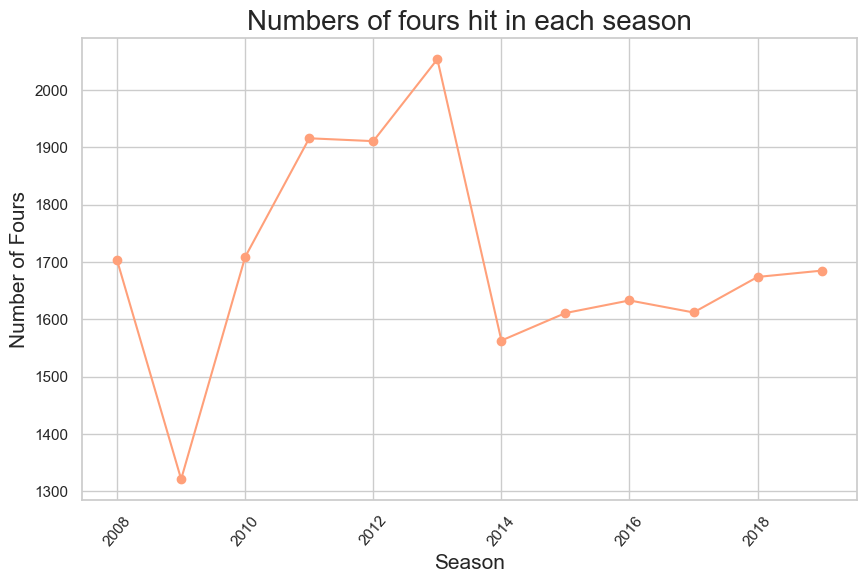

In [72]:
# Grouping by season and counting the number of fours hit in each season
fours_per_season = four_data.groupby('season')['batsman_runs'].agg([('fours', 'count')]).reset_index()

# Plotting using a line plot
plt.figure(figsize=(10, 6))
plt.plot(fours_per_season['season'], fours_per_season['fours'], marker='o', color='#FFA07A', linestyle='-')
plt.title("Numbers of fours hit in each season", fontsize=20)
plt.xlabel("Season", fontsize=15)
plt.ylabel("Number of Fours", fontsize=15)
plt.xticks(rotation=50)
plt.grid(True) 
plt.show()


# Player Analysis

## 21.  Most Number of Maximum (6s)

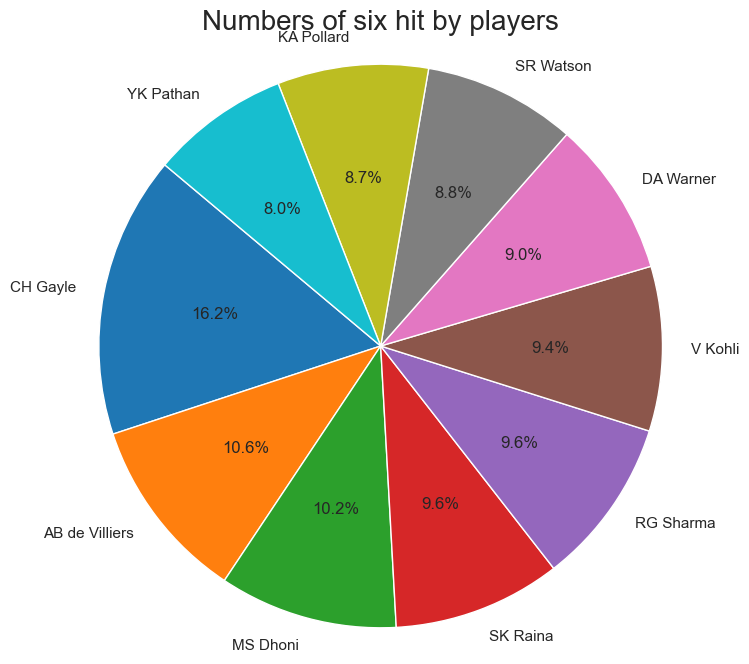

In [76]:
# Calculate the number of sixes hit by each player
batsman_six = six_data.groupby('batsman')['batsman_runs'].agg([('six', 'count')]).reset_index()

# Sort the DataFrame by the number of sixes in descending order
batsman_six = batsman_six.sort_values(by='six', ascending=False)

# Get the top 10 players by sixes hit
top_10_players = batsman_six.iloc[:10]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_players['six'], labels=top_10_players['batsman'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title("Numbers of six hit by players", fontsize=20)
plt.axis('equal')  
plt.show()

Chris Gayle hit the most sixes in the IPL, followed by AB de Villiers and Rohit Sharma during the period from 2008 to 2019.

## 22. Most Number of Maximum (4s)

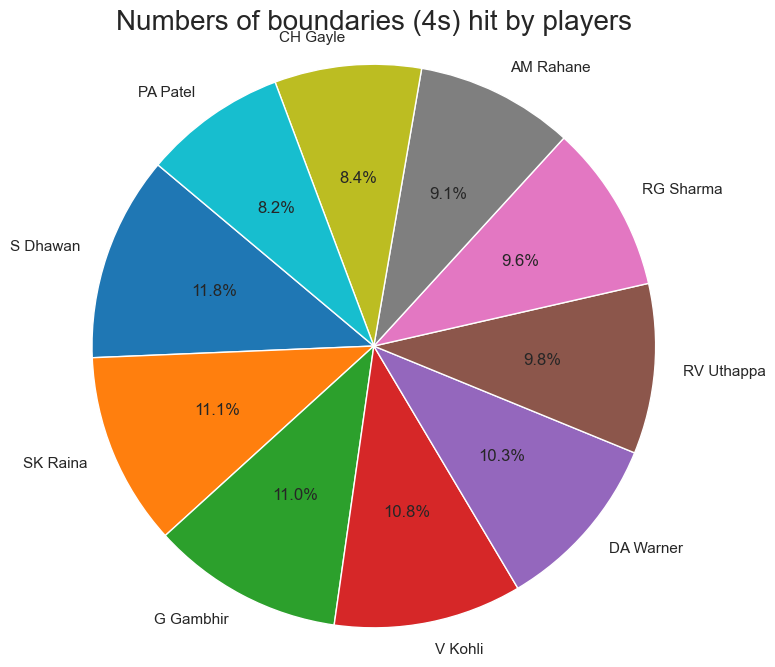

In [78]:
# Calculate the number of fours hit by each player
batsman_fours = four_data.groupby('batsman')['batsman_runs'].agg([('fours', 'count')]).reset_index()

# Sort the DataFrame by the number of fours in descending order
batsman_fours = batsman_fours.sort_values(by='fours', ascending=False)

# Get the top 10 players by fours hit
top_10_fours_players = batsman_fours.iloc[:10]

# Create a pie chart for the most number of boundaries (4s) hit by players
plt.figure(figsize=(8, 8))
plt.pie(top_10_fours_players['fours'], labels=top_10_fours_players['batsman'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title("Numbers of boundaries (4s) hit by players", fontsize=20)
plt.axis('equal')  
plt.show()


S Dhawan hit the most sixes in the IPL, followed by SK Rainna and G Gambhir during the period from 2008 to 2019.

## 23. Highest Run Scorers

In [79]:
runscorer = Data.groupby('batsman')['batsman_runs'].sum()
runscorer = runscorer.sort_values(ascending=False)

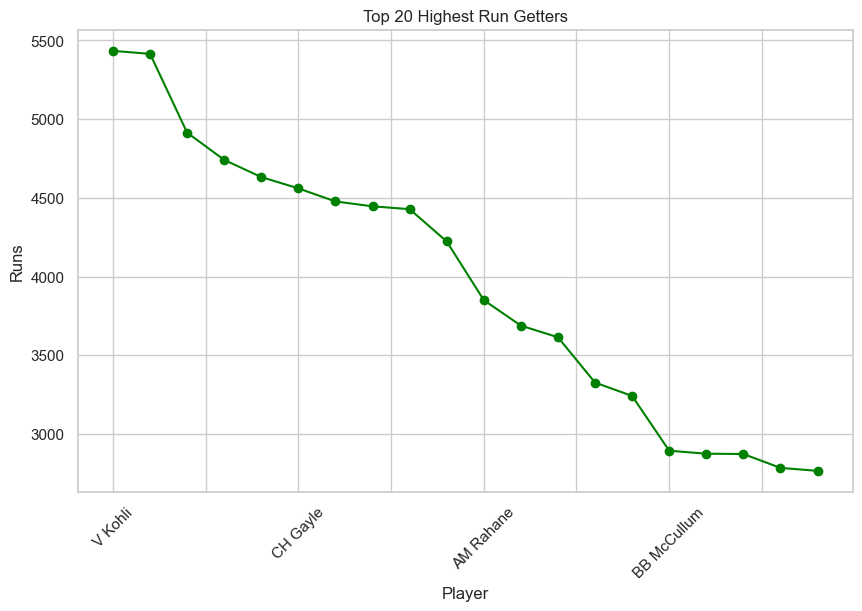

In [80]:
plt.figure(figsize=(10, 6))
runscorer[:20].plot(kind='line', marker='o', color='green')
plt.title('Top 20 Highest Run Getters')
plt.xlabel('Player')
plt.ylabel('Runs')
plt.xticks(rotation=45)  
plt.grid(True)  
plt.show()

Virat Kohli has the most runs in the IPL.

## 24.  Most Number of Half-Centuries and Centuries

In [81]:
matchruns = Data.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index()
matchruns.head()

,match_id,batsman,batsman_runs
0,1,A Choudhary,6
1,1,BCJ Cutting,16
2,1,CH Gayle,32
3,1,DA Warner,14
4,1,DJ Hooda,16


## 25. Most Number of Half-Centuries

In [82]:
fifties = matchruns[(matchruns['batsman_runs'] >=50) & (matchruns['batsman_runs'] < 100)]
halfcents = fifties['batsman'].value_counts()

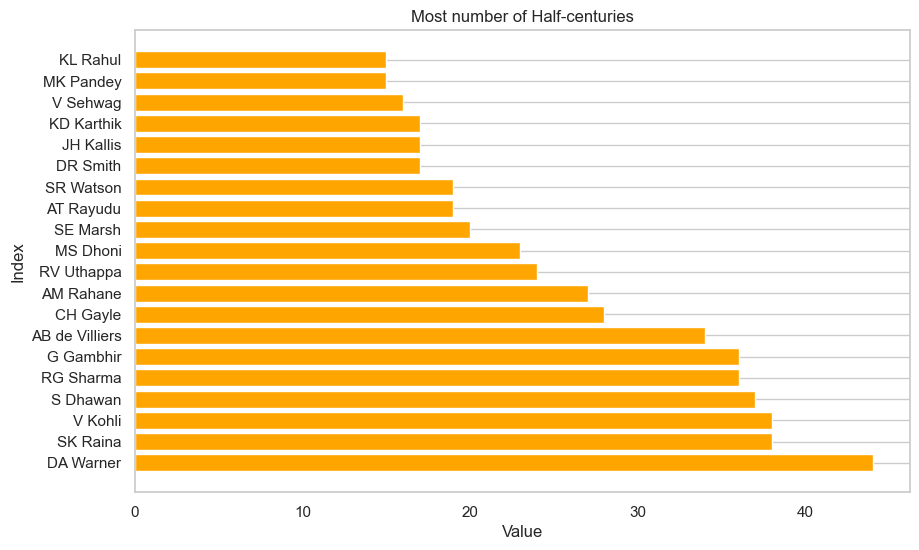

In [83]:

top_20_values = halfcents[:20]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_20_values.index, top_20_values.values, color='Orange')
plt.title('Most number of Half-centuries')
plt.xlabel('Value')
plt.ylabel('Index')
plt.grid(axis='x')  
plt.show()


DA Warner has the most number of half centuries in the IPL.

## 26.  Most Number of Centuries

In [84]:
centuries = matchruns[matchruns['batsman_runs'] >=100]
cents = centuries['batsman'].value_counts()

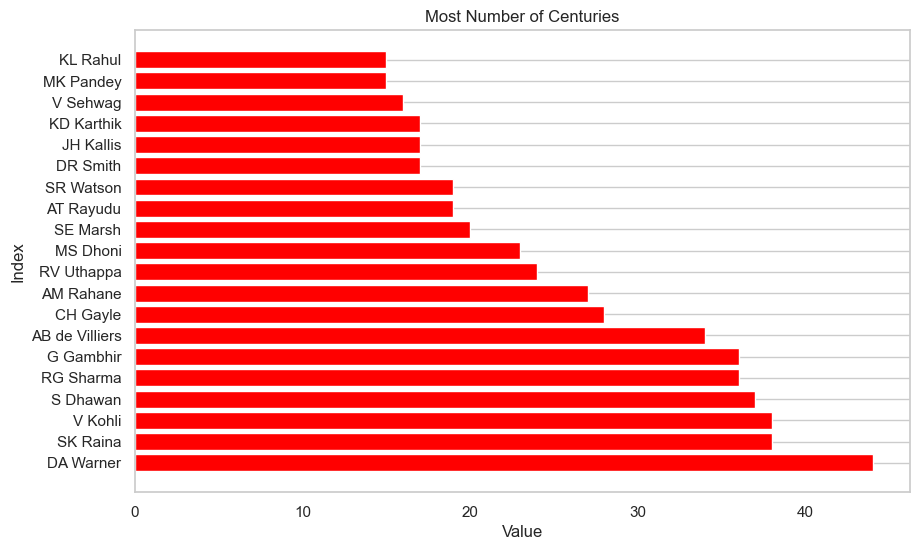

In [85]:
# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_20_values.index, top_20_values.values, color='red')
plt.title('Most Number of Centuries')
plt.xlabel('Value')
plt.ylabel('Index')
plt.grid(axis='x')  
plt.show()

CH Gayle has the most number of centuries in the IPL during period from 2008 to 2019

## 27.  Highest Scores of Each Batsman

In [86]:
highest = Data.groupby(['match_id','batting_team','batsman'])['batsman_runs'].sum().reset_index()
batsman_highest = highest.groupby('batsman')['batsman_runs'].max().sort_values(ascending=False)
batsman_highest.head()

batsman
CH Gayle          175
BB McCullum       158
AB de Villiers    133
RR Pant           130
M Vijay           127
Name: batsman_runs, dtype: int64

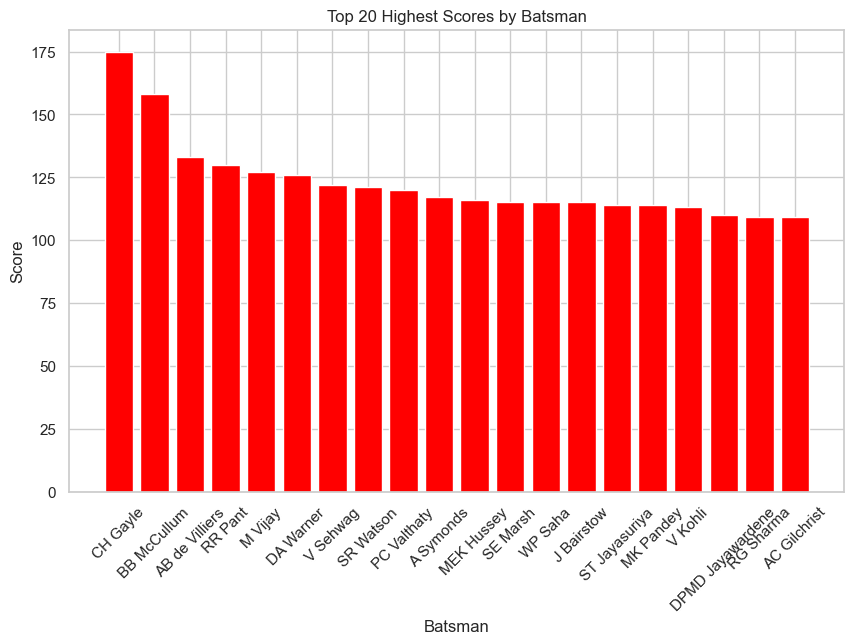

In [87]:
# Get the top 20 highest scores by batsman
top_20_highest_scores = batsman_highest[:20]

# Create a vertical bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_20_highest_scores.index, top_20_highest_scores.values, color='red')
plt.title('Top 20 Highest Scores by Batsman')
plt.xlabel('Batsman')
plt.ylabel('Score')
plt.xticks(rotation=45)  
plt.show()

CH Gayle has the highest score by any batsman in the IPL.

## 28.  Player who got dismissed most number of times

In [88]:
Data['player_dismissed'].value_counts()

SK Raina      162
RG Sharma     155
RV Uthappa    153
V Kohli       143
S Dhawan      137
             ... 
S Randiv        1
R Ninan         1
B Sumanth       1
C Madan         1
S Singh         1
Name: player_dismissed, Length: 487, dtype: int64

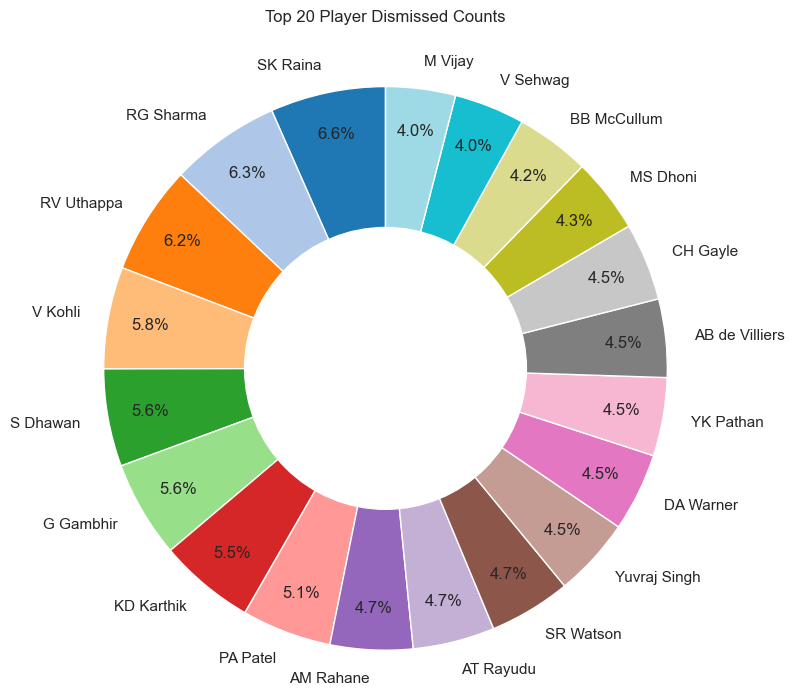

In [101]:
# Calculate top 20 values
top_20_values = Data['player_dismissed'].value_counts()[:20]

# Create the outer ring pie chart
plt.figure(figsize=(8, 8))
outer_colors = plt.cm.tab20.colors
plt.pie(top_20_values, labels=top_20_values.index, autopct='%1.1f%%', startangle=90, colors=outer_colors, pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.5, color='white')  
plt.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.title('Top 20 Player Dismissed Counts', y=1.05)  
plt.show()


SK Raina has the most dismissals in the Indian Premier League (IPL). RG Sharma  is second during period from 2008 to 2019

# Bowling Analysis

## 29. Kind of dismissal

In [102]:
Data['dismissal_kind'].value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

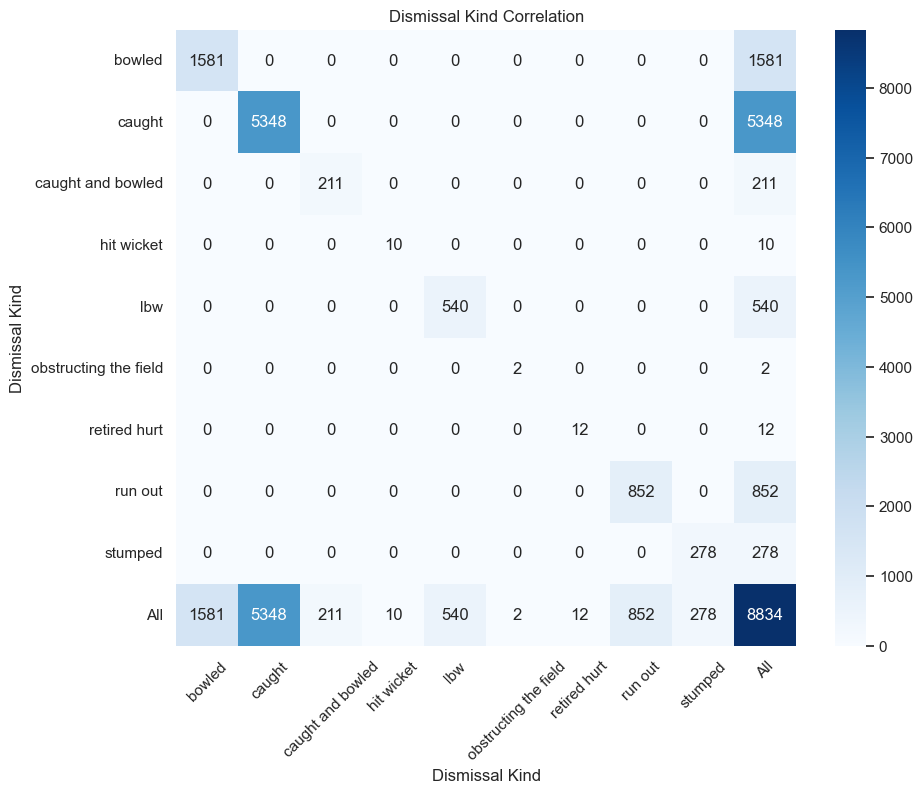

In [103]:
# Calculate contingency table for dismissal kinds
dismissal_contingency = pd.crosstab(index=Data['dismissal_kind'], columns=Data['dismissal_kind'], margins=True)

# Create a heatmap for the contingency table
plt.figure(figsize=(10, 8))
sns.heatmap(dismissal_contingency, annot=True, cmap='Blues', fmt='d')
plt.title('Dismissal Kind Correlation')
plt.xlabel('Dismissal Kind')
plt.ylabel('Dismissal Kind')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


The most common dismissal methods are caught, bowled, and run out. Less common methods include LBW, stumped, caught and bowled, retired hurt, hit wicket, and obstructing the field

## 30. Bowler with most number of wickets

In [104]:
Data['dismissal_kind'].unique()
kind = ['caught','bowled','lbw','caught and bowled','stumped','hit wicket']


In [105]:
out = Data[Data['dismissal_kind'].isin (kind)]
out.tail()
out['bowler'].value_counts()

SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
                  ... 
S Vidyut             1
DB Ravi Teja         1
AM Rahane            1
SB Joshi             1
TP Sudhindra         1
Name: bowler, Length: 348, dtype: int64

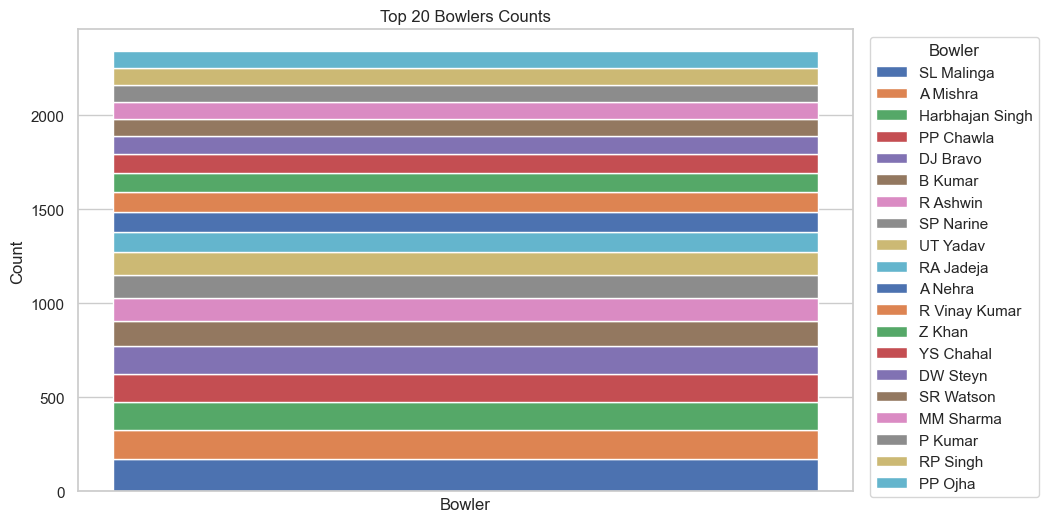

In [106]:
# Get the top 20 values
top_20_values = out['bowler'].value_counts()[:20]

# Create a segmented bar chart
plt.figure(figsize=(10, 6))
bottom = 0
for bowler, count in top_20_values.items():
    plt.bar(1, count, bottom=bottom, label=bowler)
    bottom += count

plt.title('Top 20 Bowlers Counts')
plt.xlabel('Bowler')
plt.ylabel('Count')
plt.xticks([])
plt.legend(title='Bowler', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()


SM Malinga has most number of wickets in IPL during period from 2008 to 2019